In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('creditcard.csv.zip')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
if 'Class' not in df.columns:
    raise ValueError("The dataframe does not contain a column named 'class'")

# Select 9 random columns excluding 'class'
other_columns = np.random.choice([col for col in df.columns if col != 'class'], 9, replace=False)
selected_columns = np.append(other_columns, 'Class')
selected_rows = np.random.choice(df.index, 10000, replace=False)
sampled_df = df.loc[selected_rows, selected_columns]

# Check the shape of the new dataframe
print(sampled_df.shape)

(10000, 10)


In [6]:
sampled_df.head()

,V26,V8,V4,V6,V7,V27,V22,V2,V1,Class
251651,-0.430600,-0.222985,-1.631255,-0.769298,-0.700689,-0.039196,-0.848403,-1.631490,2.077709,0
152723,0.408129,0.060974,0.476847,-0.023067,-1.029069,-0.052675,-0.051300,-0.546789,1.932487,0
237783,0.121718,0.911467,-0.809086,-0.453426,0.079703,0.024017,-0.961248,1.828415,-1.633965,0
206735,0.149113,-0.244011,-0.425484,-1.298011,0.831123,0.085676,-0.514414,0.185053,-0.806219,0
99036,0.146270,0.005014,2.459622,-0.110888,0.176834,-0.038740,-0.399995,0.373632,1.231106,0


In [7]:
from sklearn.model_selection import train_test_split


X = sampled_df.drop('Class', axis=1)

# Target variable (y) is the 'class' column
y = sampled_df['Class']

# Split the data into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, print the shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8000, 9)
X_test shape: (2000, 9)
y_train shape: (8000,)
y_test shape: (2000,)


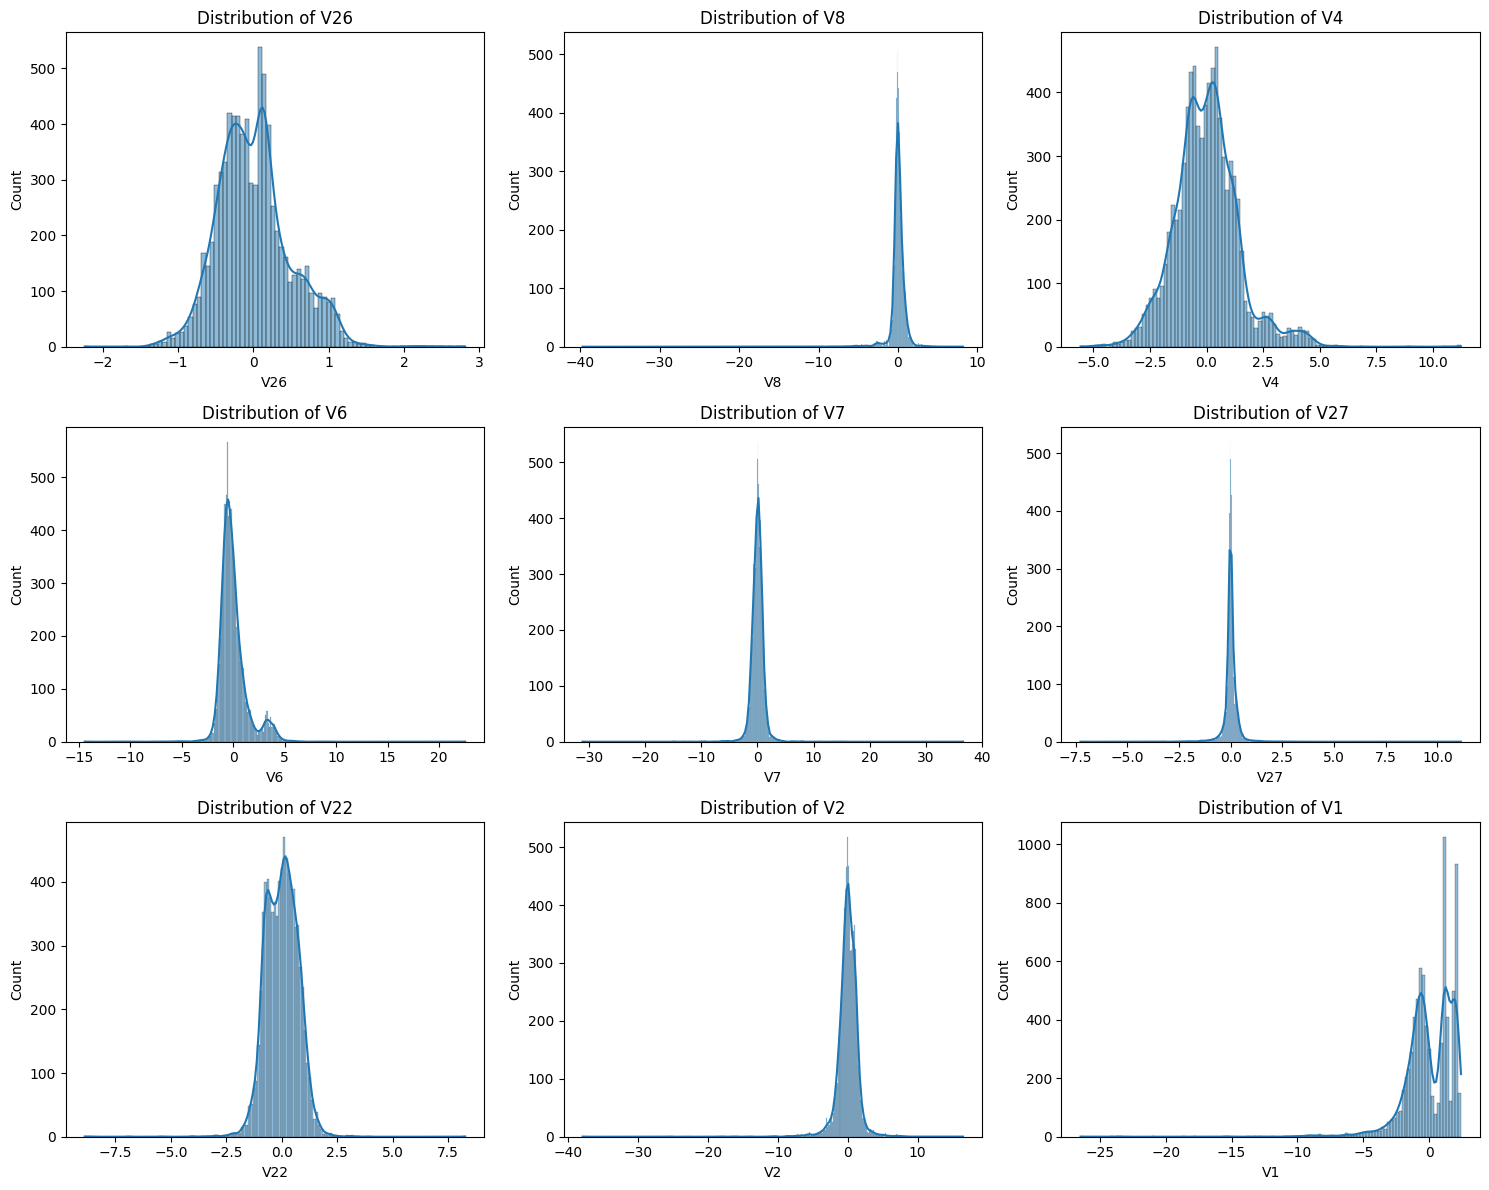

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train is your feature dataframe without the 'class' column

# Set the number of columns for the plot grid
num_cols = 3  
num_rows = (X_train.shape[1] + num_cols - 1) // num_cols  # Calculate rows needed

plt.figure(figsize=(15, num_rows * 4))

for i, column in enumerate(X_train.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(X_train[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

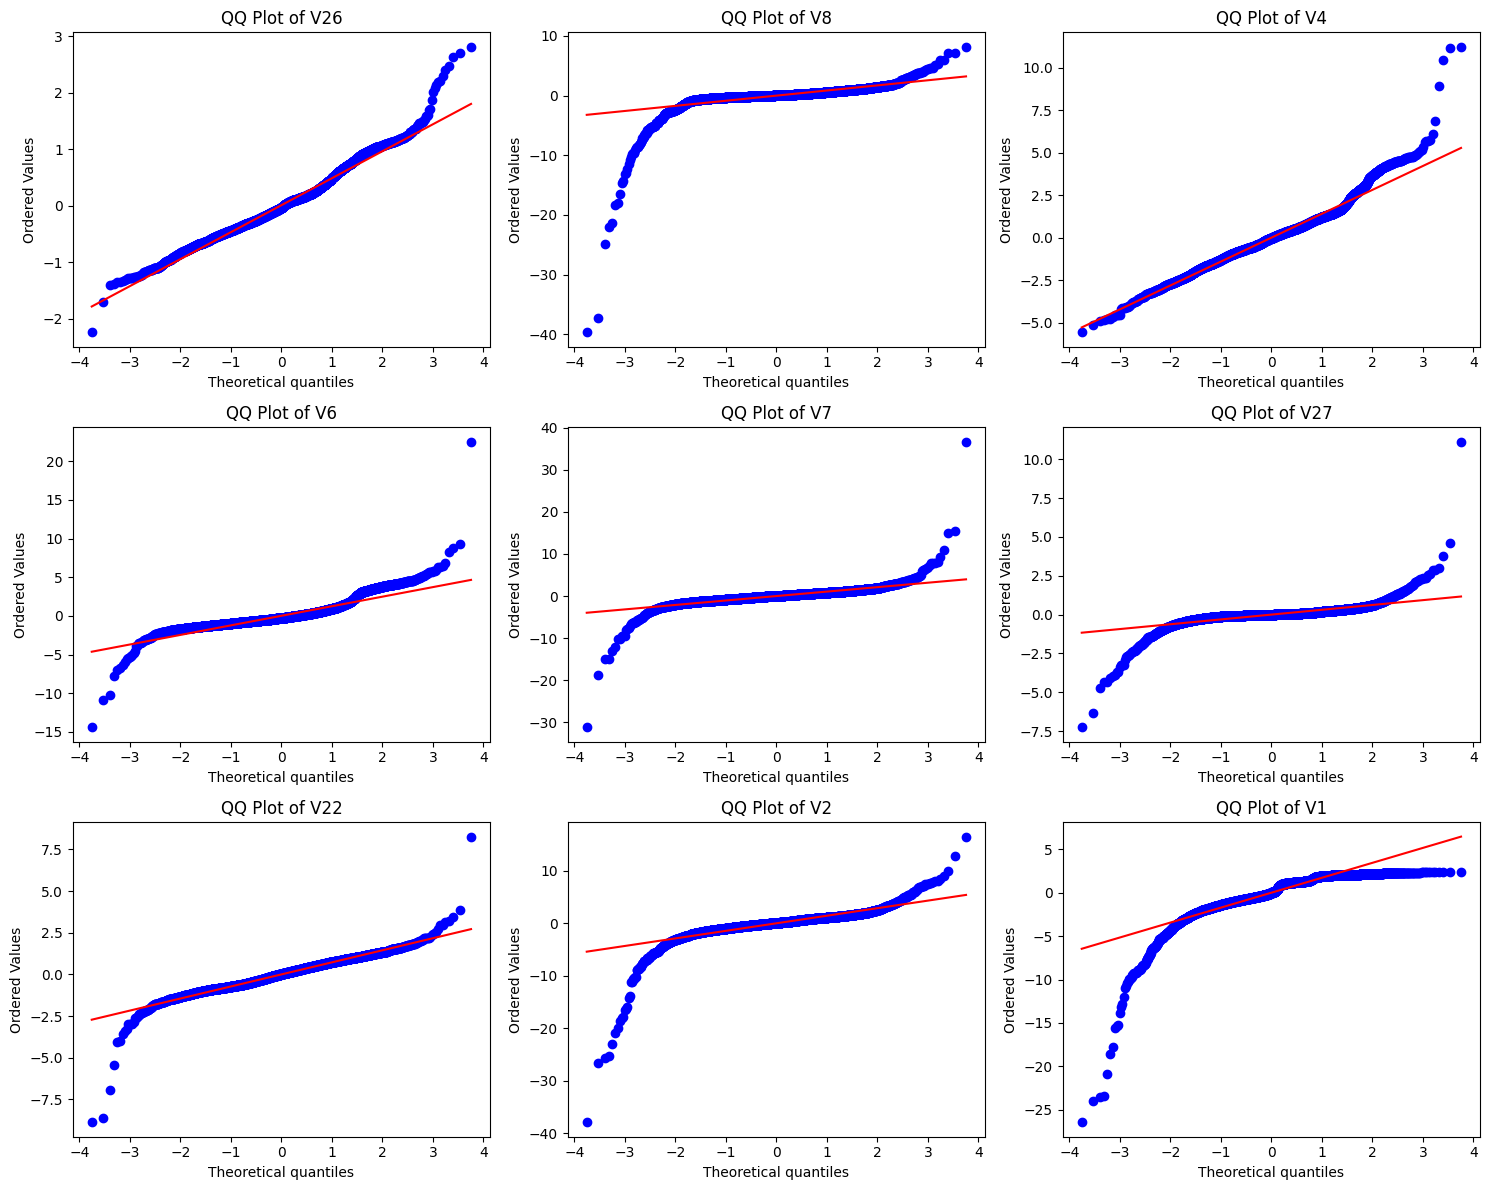

In [9]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming X_train contains the feature columns only (no 'class' column)

num_cols = 3
num_rows = (X_train.shape[1] + num_cols - 1) // num_cols

plt.figure(figsize=(15, num_rows * 4))

for i, column in enumerate(X_train.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    stats.probplot(X_train[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column}')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform

reg = LogisticRegression(random_state=42)
reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [11]:
X_test_scaled = scaler.transform(X_test)

# Optional: Predict using the logistic regression model
y_pred = reg.predict(X_test_scaled)

In [12]:
from sklearn.metrics import confusion_matrix

# Count number of predicted 1s
pred_ones = (y_pred == 1).sum()

# Count number of actual 1s in y_test
actual_ones = (y_test == 1).sum()

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(f'Number of predicted ones (y_pred == 1): {pred_ones}')
print(f'Number of actual ones (y_test == 1): {actual_ones}')
print('Confusion Matrix:')
print(cm)

Number of predicted ones (y_pred == 1): 3
Number of actual ones (y_test == 1): 2
Confusion Matrix:
[[1997    1]
 [   0    2]]


In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression


base_estimator = LogisticRegression(random_state=42)

bagging_clf = BaggingClassifier(
    estimator=base_estimator, 
    n_estimators=5,           
    random_state=42,
    n_jobs=-1                  
)

bagging_clf.fit(X_train_scaled, y_train)

# To make predictions on the test set:
y_pred_bagging = bagging_clf.predict(X_test_scaled)

In [14]:
from sklearn.metrics import confusion_matrix

# After you have run:
# y_pred_bagging = bagging_clf.predict(X_test_scaled)

cm_bagging = confusion_matrix(y_test, y_pred_bagging)
print("Confusion Matrix for Bagging Logistic Regression:")
print(cm_bagging)

Confusion Matrix for Bagging Logistic Regression:
[[1997    1]
 [   0    2]]


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

# Fit the random forest to the scaled training data
rf_clf.fit(X_train_scaled, y_train)

# Predict the test set
y_pred_rf = rf_clf.predict(X_test_scaled)

# Calculate and print the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(cm_rf)

Confusion Matrix for Random Forest:
[[1998    0]
 [   0    2]]


In [17]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# Example 1: AdaBoost
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train_scaled, y_train)
y_pred_ada = ada_clf.predict(X_test_scaled)
cm_ada = confusion_matrix(y_test, y_pred_ada)
print("Confusion Matrix for AdaBoost:")
print(cm_ada)

# Example 2: Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train_scaled, y_train)
y_pred_gb = gb_clf.predict(X_test_scaled)
cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix for Gradient Boosting:")
print(cm_gb)

Confusion Matrix for AdaBoost:
[[1998    0]
 [   1    1]]
Confusion Matrix for Gradient Boosting:
[[1996    2]
 [   1    1]]


In [18]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the XGBoost model to the scaled training data
xgb_clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_xgb = xgb_clf.predict(X_test_scaled)

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix for XGBoost:")
print(cm_xgb)

Confusion Matrix for XGBoost:
[[1997    1]
 [   1    1]]


C:\Users\hp\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:11:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
